# Utterances

EXISTING

This data frame lists the movie lines (utterances) and the character speaking. The `line_ID` column is referenced in the `conversations_df`.

## Table of Contents
- [1st Section](#Loading-in-the-data-and-basic-summary) is where I import the files and get an idea of the data shape and contents
- [2nd section](#Tokenizing) is where I tokenize the text for words and sentences
- [3rd section](#EDA) is where I gather some more statistics about the data after tokenization
- [4th section](#Pickling-the-data-and-creating-a-csv) is where the data are saved and exported
- [Conclusion](#Conclusion) summarizes the notebook

In [1]:
# import packages
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

## Loading in the data and basic summary

In [2]:
# creating the df
utterances_df = pd.read_csv('../data/movie_lines.txt', sep='\s+\+\+\+\$\+\+\+\s?',
                            names=['line_ID', 'character_ID' , 'movie_ID', 'character_name', 'utterance'], 
                            dtype='string', engine='python', encoding='ISO-8859-1')

The data were all separated with ' +++$+++ ' and did not have column names. The README from the original data described what each column was in the data so I used that to create column names.

In [3]:
utterances_df.shape

(304713, 5)

In [4]:
utterances_df.info()
# looks like there may be some missing information here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   line_ID         304713 non-null  string
 1   character_ID    304713 non-null  string
 2   movie_ID        304713 non-null  string
 3   character_name  304670 non-null  string
 4   utterance       304446 non-null  string
dtypes: string(5)
memory usage: 11.6 MB


I am not sure why there are empty utterances but they will impact the summary statistics below so I will remove them from the data frame. There may be discourse meaning to these turns being empty, but they do not convey any linguistic information so it should not have any significant impact on my analysis.

In [5]:
utterances_df = utterances_df.dropna()

In [6]:
utterances_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


## Tokenizing

In [7]:
# tokenizing
utterances_df['sents'] = utterances_df.utterance.map(nltk.sent_tokenize)
utterances_df['tokens'] = utterances_df.utterance.map(nltk.word_tokenize)

In [8]:
# token counts
utterances_df['sent_count'] = utterances_df.sents.map(len)
utterances_df['token_count'] = utterances_df.tokens.map(len)

In [9]:
# sent length
utterances_df['avg_sent_length'] = utterances_df.token_count / utterances_df.sent_count

In [10]:
utterances_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,sent_count,token_count,avg_sent_length
0,L1045,u0,m0,BIANCA,They do not!,[They do not!],"[They, do, not, !]",1,4,4.0
1,L1044,u2,m0,CAMERON,They do to!,[They do to!],"[They, do, to, !]",1,4,4.0
2,L985,u0,m0,BIANCA,I hope so.,[I hope so.],"[I, hope, so, .]",1,4,4.0
3,L984,u2,m0,CAMERON,She okay?,[She okay?],"[She, okay, ?]",1,3,3.0
4,L925,u0,m0,BIANCA,Let's go.,[Let's go.],"[Let, 's, go, .]",1,4,4.0


In [11]:
utterances_df.describe()

,sent_count,token_count,avg_sent_length
count,304403.000000,304403.000000,304403.000000
mean,1.695433,13.736120,7.856031
std,1.252371,14.712649,5.155597
min,1.000000,1.000000,1.000000
25%,1.000000,5.000000,4.500000
50%,1.000000,9.000000,7.000000
75%,2.000000,17.000000,10.000000
max,45.000000,684.000000,122.000000


## EDA

Below I will look at some summary statistics related to the utterances. Average token per turn, average sentence length, and average number of sentences per turn.

### Token counts

In [12]:
# looking at token counts
utterances_df.agg({'token_count': ['mean', 'median', 'min', 'max', 'std']})

,token_count
mean,13.736120
median,9.000000
min,1.000000
max,684.000000
std,14.712649


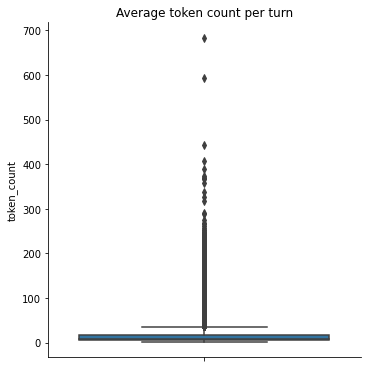

In [13]:
sns.catplot(data=utterances_df, y='token_count', kind='box')
plt.title('Average token count per turn')
plt.savefig('../data_visualization/token_count_box.png')
plt.show()

The average turn/utterance is almost 14 words long. But there is a wide standard deviation. The longest turn by token is 684 tokens long.

In [14]:
utterances_df[utterances_df.token_count==684].iloc[0][4]

'Then let\'s begin with the story itself. It\'s a story of the Grail myth...And although there are several variations, my favorite begins with the Fisher King as a young boy... who had to spend a night alone in the forest to prove his courage... and during that night, he is visited by a sacred vision. Out of the fire, appears the Holy Grail - God\'s highest symbol of divine grace. And a voice says to the boy, "You shall be the guardian of the Grail, that it may heal the hearts of men"...But the boy was overcome ...Innocent and foolish, he was blinded by greater visions - a life ahead filled with beauty and glory, hope and power...Tears filled his eyes as he sensed his own... invincibility. A boy\'s tears of naive wonder and inspiration. and in this state of...radical amazement...he felt for a brief moment, not like a boy, but like God...  ...And so he reached into the fire to take the Grail. And the Grail vanished. And the boy hands were left caught in the flames...leaving him wounded 

Looks like this may be a monologue intro to the movie.

### Tokens per sentence

In [15]:
# looking at sentence lengths
utterances_df.agg({'avg_sent_length': ['mean', 'median', 'min', 'max', 'std']})

,avg_sent_length
mean,7.856031
median,7.000000
min,1.000000
max,122.000000
std,5.155597


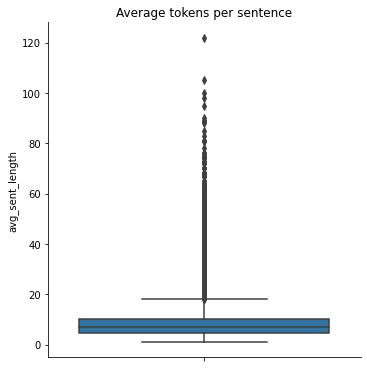

In [16]:
sns.catplot(data=utterances_df, y='avg_sent_length', kind='box')
plt.title('Average tokens per sentence')
plt.savefig('../data_visualization/avg_sent_length_box.png')
plt.show()

Average sentence length is just under 8 tokens. This seems reasonable. The standard deviation is lower than tokens per turn. The highest number of tokens is very surprising. Let's take a look.

In [17]:
utterances_df[utterances_df.avg_sent_length==122].iloc[0][4]

"Well, about six months ago -- I was going to night school, taking this course in Advanced Accounting -- and one of the guys in our department -- he lives in Jersey -- he was going to a banquet at the Biltmore -- his wife was meeting him in town, and he needed someplace to change into a tuxedo -- so I gave him the key    and word must have gotten around -- because the next thing I knew, all sorts of guys were suddenly going to banquets -- and when you give the key to one guy, you can't say no to another and the whole thing got out of hand -- pardon me."

I expected it to be an issue with tokenization, but that is not the case. Just a longer turn with dashes as pauses instead of periods or other punctuation.

### Sentences per turn

In [18]:
# looking at sentences per turn
utterances_df.agg({'sent_count': ['mean', 'median', 'min', 'max', 'std']})

,sent_count
mean,1.695433
median,1.000000
min,1.000000
max,45.000000
std,1.252371


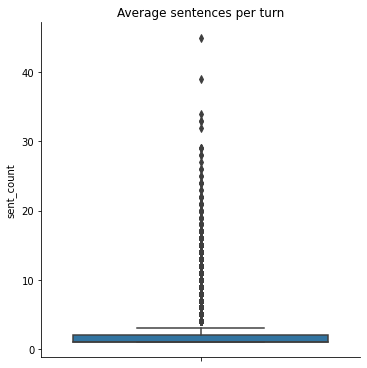

In [19]:
sns.catplot(data=utterances_df, y='sent_count', kind='box')
plt.title('Average sentences per turn')
plt.savefig('../data_visualization/sent_count_box.png')
plt.show()

On average there are less than two sentences per turn. This makes sense, the longer a turn is in the conversation the more one-sided the conversation is. There is very low standard deviation too, despite the fact that the max sentence in one turn is 45.

In [20]:
utterances_df[utterances_df.sent_count==45].iloc[0][4]

"Just a minute \x96\x96 just a minute. Now, hold on, Mr. Potter. You're right when you say my father was no business man. I know that. Why he ever started this cheap, penny-ante Building and Loan, I'll never know. But neither you nor anybody else can say anything against his character, because his whole life was . . . Why, in the twenty-five years since he and Uncle Billy started this thing, he never once thought of himself. Isn't that right, Uncle Billy? He didn't save enough money to send Harry to school, let alone me. But he did help a few people get out of your slums, Mr. Potter. And what's wrong with that? Why . . . Here, you're all businessmen here. Doesn't it make them better citizens? Doesn't it make them better customers? You . . . you said . . . What'd you say just a minute ago? . . . They had to wait and save their money before they even ought to think of a decent home. Wait! Wait for what? Until their children grow up and leave them? Until they're so old and broken-down tha

This looks like a tokenization issue! There are a lot of elipses in this turn that are likely being count as sentences. The mean and median are slightly off, but the other summary statistics reflect this same difference. This isn't ideal, but I will leave this utterance in the data, as is.

## Pickling the data and creating a csv

In [21]:
import pickle

In [22]:
# pickle the data to use in other notebooks for further analysis
f = open('utterances_df.pkl', 'wb')
pickle.dump(utterances_df, f, -1)
f.close()

In [23]:
# run this notebook and this chunk to generate the df as a csv file
# utterances_df.to_csv('../new_data/utterances_df.csv', header=True)

## Conclusion

There were some high maximum data points across tokens and sentences per turn as well as sentence length. However, the averages all seem reasonable for the measurements, so I am not concerned. There were empty utterances which I removed from the data frame.